<a href="https://colab.research.google.com/github/SmrutiNIT/PythonBasics-May-29-Batch/blob/main/Assignment_12_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
train = pd.read_csv("/content/SalaryData_Train .csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
len(train.age),len(train.columns)

(30161, 14)

In [50]:
train.shape

(30161, 14)

In [51]:
test = pd.read_csv("/content/SalaryData_Test .csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [52]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [53]:
test.shape

(15060, 14)

Combining the Both test and train split and then going to preform navie bayes classifier 

In [54]:
data =pd.merge(train,test)

In [55]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K


Data Preprocessing

In [56]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,32.815059,9.774450,49.204738,2.436548,38.545516
std,10.892922,1.675096,1433.023789,71.195428,7.456800
min,17.000000,1.000000,0.000000,0.000000,8.000000
25%,23.000000,9.000000,0.000000,0.000000,40.000000
50%,32.000000,9.000000,0.000000,0.000000,40.000000
75%,40.000000,10.000000,0.000000,0.000000,40.000000
max,67.000000,16.000000,99999.000000,2415.000000,85.000000


In [57]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [58]:
data.info

<bound method DataFrame.info of       age      workclass      education  educationno        maritalstatus  \
0      38        Private        HS-grad            9             Divorced   
1      19        Private        HS-grad            9        Never-married   
2      19        Private        HS-grad            9        Never-married   
3      19        Private        HS-grad            9        Never-married   
4      19        Private        HS-grad            9        Never-married   
...   ...            ...            ...          ...                  ...   
5905   61        Private        7th-8th            4   Married-civ-spouse   
5906   45   Self-emp-inc      Bachelors           13   Married-civ-spouse   
5907   32        Private   Some-college           10        Never-married   
5908   33        Private        HS-grad            9             Divorced   
5909   57        Private        HS-grad            9   Married-civ-spouse   

              occupation    relationship   

In [59]:
data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [60]:
def count_plot(data, columns):
    plt.figure(figsize=(15, 10))
    for indx, var  in enumerate(columns):
        plt.subplot(5,3 , indx+1)
        g = sns.countplot(data[var], hue= data['Salary'])
    plt.tight_layout()
features = data.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

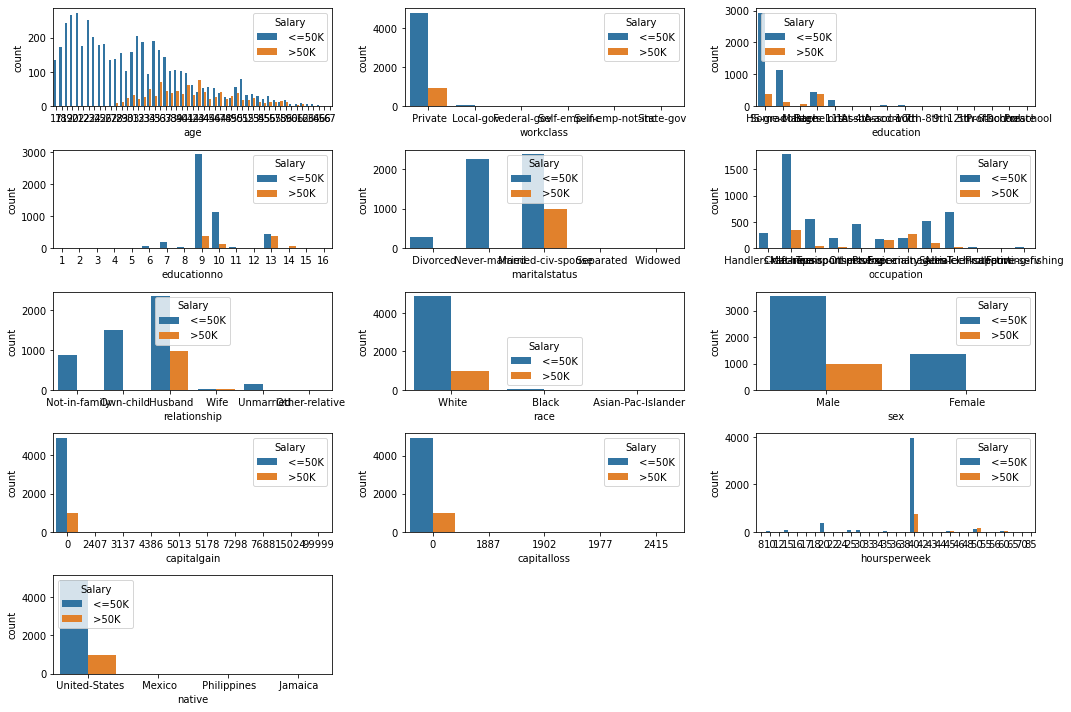

In [61]:
count_plot(data,features)

In [62]:
for var in features:
    print(data[var].value_counts().sort_values(ascending=False) / data.shape[0])
    print('=' * 30)
    print()

21    0.046193
20    0.044839
23    0.042640
19    0.041117
36    0.039594
32    0.038409
35    0.037563
33    0.036210
24    0.034179
31    0.032318
37    0.031980
26    0.031134
25    0.030288
22    0.029949
18    0.029442
29    0.028765
41    0.026565
39    0.025381
28    0.025042
34    0.024535
38    0.024365
40    0.023519
27    0.022843
17    0.022843
30    0.021658
43    0.020305
51    0.016751
50    0.016413
42    0.016074
44    0.016074
47    0.013706
46    0.013706
45    0.013367
53    0.010491
49    0.008968
52    0.008799
48    0.008291
56    0.007445
54    0.007276
57    0.005753
55    0.005415
59    0.005245
58    0.004569
62    0.002876
61    0.001861
63    0.001354
60    0.001354
64    0.001015
65    0.000677
67    0.000508
66    0.000338
Name: age, dtype: float64

 Private             0.967513
 Local-gov           0.011844
 Self-emp-not-inc    0.008291
 State-gov           0.004907
 Self-emp-inc        0.004399
 Federal-gov         0.003046
Name: workclass, dtype: floa

In [63]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score,classification_report
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

Ordinal and Label Encodings for Independent Feature

In [64]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(data[features])
data_encoded = pd.DataFrame(data_encoded, columns=features)
data_encoded

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,21.0,2.0,11.0,8.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,17.0,3.0
1,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
2,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
3,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
4,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,44.0,2.0,5.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0
5906,28.0,3.0,9.0,12.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,21.0,3.0
5907,15.0,2.0,15.0,9.0,2.0,2.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
5908,16.0,2.0,11.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,17.0,3.0


In [65]:
encoder1=LabelEncoder()
data_encoded1 =encoder1.fit_transform(data['Salary'])
data_encoded1

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
data_encoded['Salary']=data_encoded1

In [67]:
data_encoded

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,21.0,2.0,11.0,8.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,17.0,3.0,0
1,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
2,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
3,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
4,2.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,44.0,2.0,5.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0,0
5906,28.0,3.0,9.0,12.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,21.0,3.0,1
5907,15.0,2.0,15.0,9.0,2.0,2.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
5908,16.0,2.0,11.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,17.0,3.0,0


In [68]:
data_encoded.shape

(5910, 14)

Train Test split

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
X=data_encoded.iloc[:,0:-1]
y=data_encoded['Salary']

In [71]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=10)

In [72]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
2755,8.0,2.0,9.0,12.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,24.0,3.0
42,19.0,2.0,11.0,8.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0
5443,43.0,4.0,11.0,8.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,11.0,3.0
904,34.0,2.0,11.0,8.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0
1937,34.0,2.0,15.0,9.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,17.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,15.0,2.0,11.0,8.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
1479,23.0,2.0,11.0,8.0,1.0,11.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0
3627,11.0,2.0,11.0,8.0,2.0,1.0,4.0,2.0,1.0,0.0,0.0,17.0,1.0
163,9.0,2.0,9.0,12.0,2.0,9.0,1.0,2.0,1.0,0.0,0.0,17.0,3.0


In [73]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((1773, 13), (4137, 13), (4137,), (1773,))

In [74]:
model =MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [75]:
y_pred =model.predict(X_test)

In [76]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [77]:
count_misclassified = (y_test != y_pred).sum()
count_misclassified

435

In [78]:
accuracy =accuracy_score(y_test,y_pred)
print(accuracy)

0.754653130287648


In [79]:
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


Precision Recall and F1 score

In [80]:
print("precision :",precision_score(y_test,y_pred,average ='micro'))
print("f1 Score:",f1_score(y_test,y_pred,average='micro'))
print("recall score:",recall_score(y_test,y_pred,average ='micro'))

precision : 0.754653130287648
f1 Score: 0.754653130287648
recall score: 0.754653130287648


Classification Report

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1464
           1       0.39      0.71      0.50       309

    accuracy                           0.75      1773
   macro avg       0.66      0.74      0.67      1773
weighted avg       0.83      0.75      0.78      1773



GaussianNB Claasifier

In [82]:
model1=GaussianNB()
model1.fit(X_train,y_train)
y_pred_gnb =model1.predict(X_test)

In [83]:
y_pred_gnb

array([0, 1, 1, ..., 0, 0, 0])

In [84]:
count_misclassifed =( y_test != y_pred_gnb ).sum()
count_misclassifed

447

more missclassifications in GassianNB when compared to MultinomialNB

In [85]:
print("Recall score : ", recall_score(y_test, y_pred_gnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_gnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_gnb , average='micro'))

Recall score :  0.7478849407783418
Precision score :  0.7478849407783418
F1 score :  0.7478849407783417
